1. Í∞úÎÖê  
 1.1 Ïö©Ïñ¥Ï†ïÎ¶¨  
 1.2 Ïû•Ï†ê  
 1.3 Îã®Ï†ê   

## Ï†ú6Ïû•. Î®∏Ïã†Îü¨Îãù
## Ï†ú5Ï†à. ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†
### 1. Î∂ÑÎ•ò
(1) scikit-learnÏùò LinearSVC
* ÏΩîÎìú Ïã§Ïäµ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c=pd.read_csv('../data/classification.csv')
c

age   interest  success
0    23.657801  18.859917      0.0
1    22.573729  17.969223      0.0
2    32.553424  29.463651      0.0
3     6.718035  25.704665      1.0
4    14.401919  16.770856      0.0
..         ...        ...      ...
292  27.697220  18.799309      0.0
293  15.150959  72.000352      1.0
294  22.264378  68.453459      1.0
295  25.677420  90.118212      1.0
296  21.215594  48.265520      1.0

[297 rows x 3 columns]

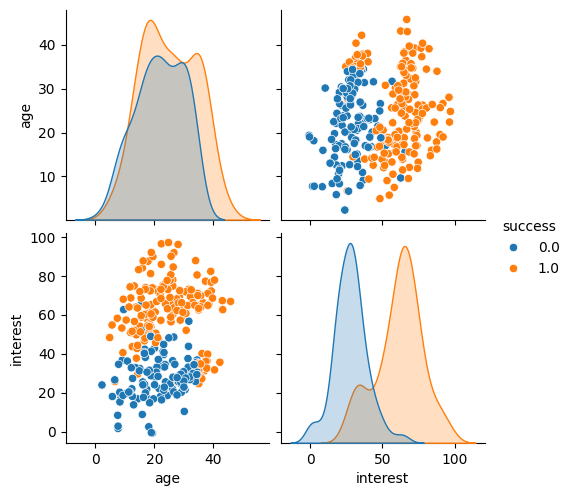

In [3]:
 sns.pairplot(hue='success', data=c)

In [4]:
from sklearn.model_selection import train_test_split

x=c[['age', 'interest']]
y=c['success']

train_x, test_x, train_y, test_y = train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(207, 2) (90, 2) (207,) (90,)


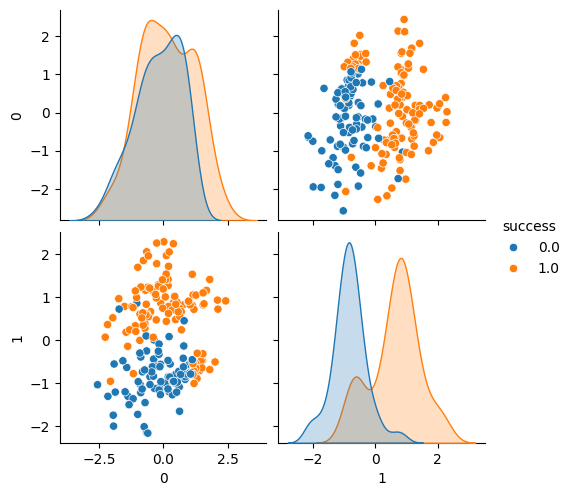

In [5]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
sns.pairplot(data=pd.concat([pd.DataFrame(train_x), train_y.reset_index(drop=True)], axis=1),
             hue='success')

In [6]:
from sklearn.svm import SVC

clf = SVC(C=0.5)
clf.fit(train_x, train_y)

SVC(C=0.5)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_x_scal = scaler.transform(test_x)
pred=clf.predict(test_x_scal)
test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y, pred)
test_rcll=recall_score(test_y, pred)
test_f1=f1_score(test_y, pred)

print(test_cm)
print('\n')
print('Ï†ïÌôïÎèÑ\t{}%'.format(round(test_acc*100,2)))
print('Ï†ïÎ∞ÄÎèÑ\t{}%'.format(round(test_prc*100,2)))
print('Ïû¨ÌòÑÏú®\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[37  2]
 [ 2 49]]


Ï†ïÌôïÎèÑ	95.56%
Ï†ïÎ∞ÄÎèÑ	96.08%
Ïû¨ÌòÑÏú®	96.08%
F1	96.08%


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


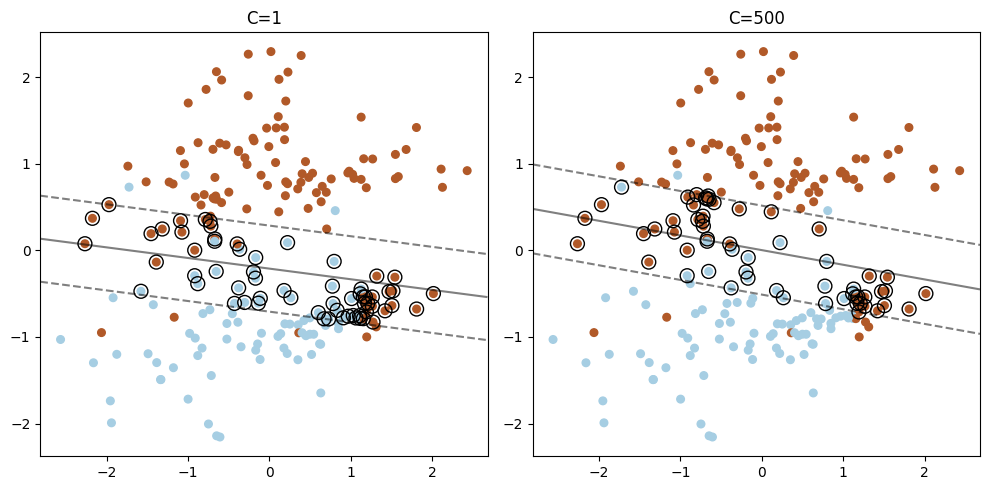

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(train_x, train_y)
    # decision functionÏúºÎ°ú ÏÑúÌè¨Ìä∏Î≤°ÌÑ∞ ÏñªÍ∏∞
    decision_function = clf.decision_function(train_x)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = train_x[support_vector_indices]

    plt.subplot(1, 2, i +1)
    plt.scatter(train_x[:, 0], train_x[:, 1], c =train_y, s =30, cmap =plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C="+str(C))
plt.tight_layout()
plt.show()

**SVR (Support Vector Regression)**ÏùÄ ÌöåÍ∑Ä Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌïú ÏßÄÎèÑ ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶òÏûÖÎãàÎã§. SVRÏùÄ epsilon-SVRÏù¥ÎùºÍ≥†ÎèÑ Î∂àÎ¶¨Î©∞, Î™®Îç∏Ïùò ÏûêÏú† Îß§Í∞úÎ≥ÄÏàòÎäî CÏôÄ epsilonÏûÖÎãàÎã§. Ïù¥ Íµ¨ÌòÑÏùÄ libsvmÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìï©ÎãàÎã§. Ïó¨Í∏∞ÏÑú kernelÏùÄ ÏïåÍ≥†Î¶¨Ï¶òÏóêÏÑú ÏÇ¨Ïö©Ìï† Ïª§ÎÑê Ïú†ÌòïÏùÑ ÏßÄÏ†ïÌï©ÎãàÎã§. Í∏∞Î≥∏Í∞íÏùÄ **‚Äòrbf‚Äô**ÏûÖÎãàÎã§. Îã§Î•∏ Ïª§ÎÑê Ïú†ÌòïÏúºÎ°úÎäî ‚Äòlinear‚Äô, ‚Äòpoly‚Äô, ‚Äòsigmoid‚Äô, **‚Äòprecomputed‚Äô**Ïù¥ ÏûàÏäµÎãàÎã§.  
  
‚Äòlinear‚Äô: ÏÑ†Ìòï Ïª§ÎÑê  
‚Äòpoly‚Äô: Îã§Ìï≠Ïãù Ïª§ÎÑê (Îã§Ìï≠Ïãù Ìï®ÏàòÏùò Ï∞®ÏàòÎ•º ÏßÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.)  
‚Äòrbf‚Äô: Radial Basis Function (Î∞©ÏÇ¨Ìòï Í∏∞Ï†Ä Ìï®Ïàò) Ïª§ÎÑê  
‚Äòsigmoid‚Äô: ÏãúÍ∑∏Î™®Ïù¥Îìú Ïª§ÎÑê  
SVRÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞Í∞Ä Î™á Îßå Í∞ú Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ÏóêÎäî ÌôïÏû•ÌïòÍ∏∞ Ïñ¥Î†§Ïö∏ Ïàò ÏûàÏúºÎØÄÎ°ú ÎåÄÍ∑úÎ™® Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî LinearSVRÏù¥ÎÇò SGDRegressorÎ•º Í≥†Î†§Ìï¥Î≥¥ÏÑ∏Ïöî. ÎòêÌïú Ïª§ÎÑê Í∑ºÏÇ¨ÌôîÎ•º ÏúÑÌï¥ Nystroem Î≥ÄÌôòÍ∏∞ÎÇò Îã§Î•∏ Ïª§ÎÑê Í∑ºÏÇ¨Ìôî Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§1234  
  
ÏûêÏÑ∏Ìïú ÎÇ¥Ïö©ÏùÄ scikit-learnÏùò SVR Î¨∏ÏÑúÎ•º Ï∞∏Ï°∞ÌïòÏãúÎ©¥ Îê©ÎãàÎã§! üòä  

### 2. ÌöåÍ∑Ä
(1) scikit-learnÏùò LinearSVR
* ÏΩîÎìú Ïã§Ïäµ

In [11]:
import numpy as np

# ÏÉòÌîåÎç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±ÌïòÍ∏∞
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

print(X[0:6], '\n\n', y[0:10])

[[0.03494921]
 [0.07488458]
 [0.16325489]
 [0.4830827 ]
 [0.61413658]
 [0.62635843]] 

 [0.0349421  0.07481462 0.16253068 0.46451132 0.57625309 0.58619837
 0.59855261 0.75807589 0.81663634 0.88952435]


In [12]:
# ÌÉÄÍπÉÎç∞Ïù¥ÌÑ∞Ïóê ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞ÄÌïòÍ∏∞
y[::5] += 3 * (0.5 - np.random.rand(8))

print(y[0:10])

[1.09093841 0.07481462 0.16253068 0.46451132 0.57625309 1.29051656
 0.59855261 0.75807589 0.81663634 0.88952435]


In [13]:
from sklearn.svm import SVR

# ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÌï©ÏãúÌÇ§Í∏∞
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [14]:
rbf_pred=svr_rbf.predict(X)
lin_pred=svr_lin.predict(X)
poly_pred=svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Radial Basis', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results=pd.DataFrame(index =kernel,columns =evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']=round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae']=round(mae,2)

results

C:\Users\user\AppData\Local\Temp\ipykernel_9848\3305470509.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc[nm]['mse']=round(mse,2)
C:\Users\user\AppData\Local\Temp\ipykernel_9848\3305470509.py:21: FutureWarning: ChainedAssig

mse  rmse   mae
Radial Basis  0.12  0.34  0.19
Linear        0.22  0.47  0.34
Polynomial    0.12  0.35  0.17

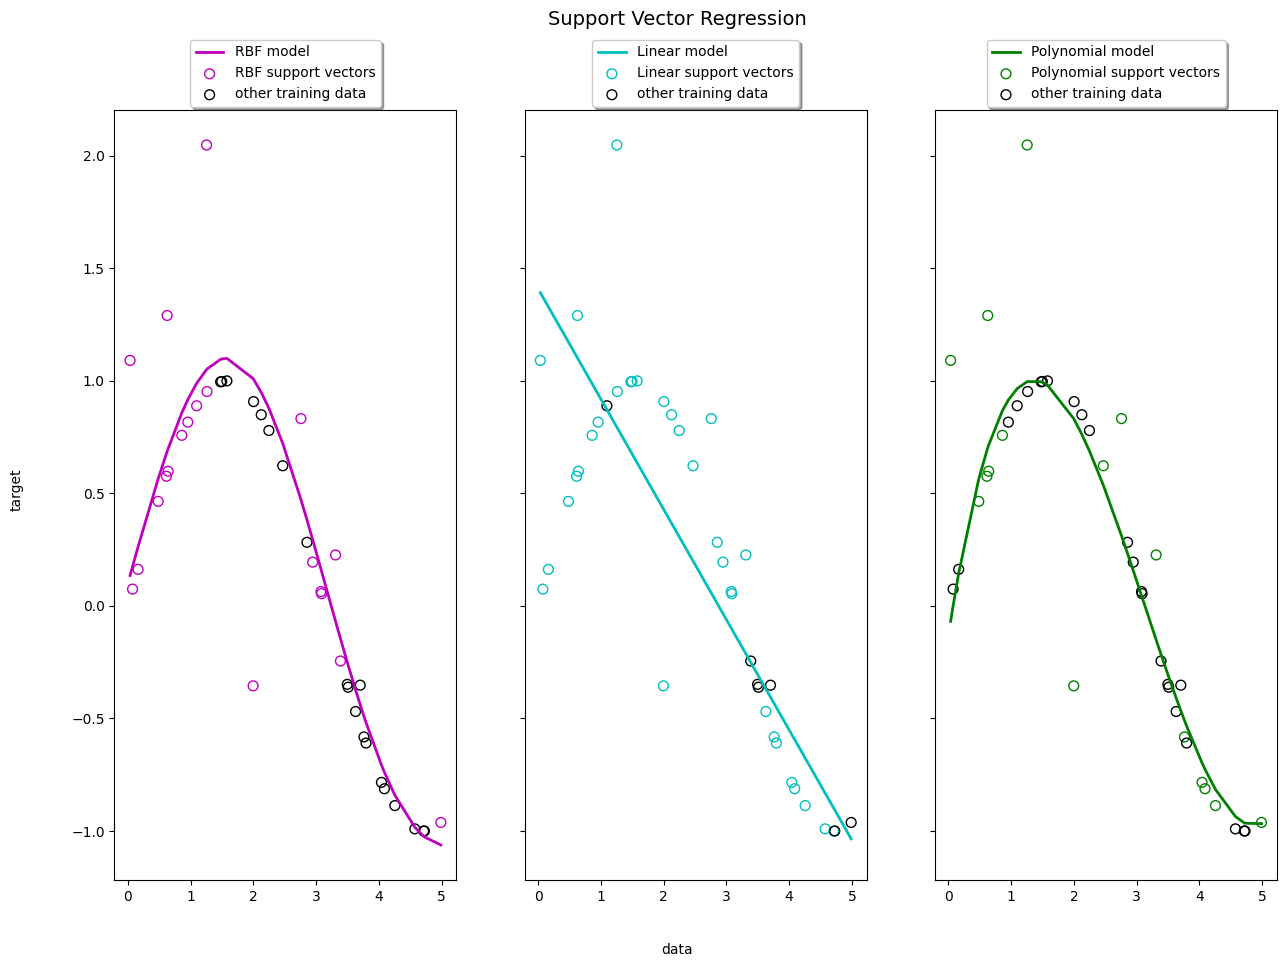

In [15]:
import matplotlib.pyplot as plt
lw =2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()